Nurul Aini (060) | Arimbi Deby Setyoningrum (186)
2024A | Kelompok 15



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


INTEGRASI


In [ ]:
#INTEGRASI PER KOTA
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import os

root_path = "/content/drive/MyDrive/Data_Iklim/IKLIM_DW"  # folder utama

cities = ["SURABAYA", "MALANG", "BANYUWANGI"]

all_city_df = {}

for city in cities:
    city_path = os.path.join(root_path, city)

    if not os.path.isdir(city_path):
        print(f"Error: Directory not found for {city_path}. Skipping this city.")
        continue

    file_list = [f for f in os.listdir(city_path) if f.endswith((".xlsx", ".xls", ".csv"))]

    df_list = []

    for file_name in file_list: # Corrected: iterate over file_list, not file_path
        full_file_path = os.path.join(city_path, file_name)
        df = pd.read_excel(full_file_path)  # sesuaikan kalau CSV
        df_list.append(df)

    # gabungkan semua file bulanan
    if df_list: # Only concatenate if there are dataframes to avoid errors with empty lists
        merged_df = pd.concat(df_list, ignore_index=True)

        # simpan ke dictionary
        all_city_df[city] = merged_df

        print(f"{city}: {len(merged_df)} baris berhasil digabung.")
    else:
        print(f"No valid .xlsx, .xls, or .csv files found for {city} in {city_path}. Skipping concatenation.")

Mounted at /content/drive
SURABAYA: 642 baris berhasil digabung.
MALANG: 642 baris berhasil digabung.
BANYUWANGI: 642 baris berhasil digabung.


In [ ]:
#MENYIMPAN
output_path = "/content/drive/MyDrive/Data_Iklim/Gabungan"

os.makedirs(output_path, exist_ok=True)

for city, df in all_city_df.items():
    df.to_excel(f"{output_path}/{city}_2024_gabungan.xlsx", index=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   534 non-null    object
 1   ID WMO       426 non-null    object
 2   :  96987     426 non-null    object
 3   Unnamed: 3   378 non-null    object
 4   Unnamed: 4   378 non-null    object
 5   Unnamed: 5   378 non-null    object
 6   Unnamed: 6   378 non-null    object
 7   Unnamed: 7   378 non-null    object
 8   Unnamed: 8   378 non-null    object
 9   Unnamed: 9   378 non-null    object
 10  Unnamed: 10  378 non-null    object
dtypes: object(11)
memory usage: 55.3+ KB


In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Gabungan/SURABAYA_2024_gabungan.xlsx")
df.head(15)


,Unnamed: 0,ID WMO,: 96933,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NAMA STASIUN,: Stasiun Meteorologi Perak I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,LINTANG,: -7.22360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,BUJUR,: 112.72390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,ELEVASI,: 3 Meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
7,01-01-2024,26.8,35,29.9,78,0.6,6,7,90,2,C
8,02-01-2024,27.4,35.8,30.6,74,0,3.4,5,310,2,C
9,03-01-2024,27.2,30.8,27.5,89,8888,6.2,3,350,1,C


In [ ]:
df = df.rename(columns={
    "Tanggal": "date",
    "Tanggal Observasi": "date",
    "Tn": "temp_min",
    "Tx": "temp_max",
    "Tavg": "temp_avg",
    "RH_avg": "humidity",
    "RH": "humidity",
    "RR": "rainfall",
    "ss": "sunshine"
})


cleaning


In [ ]:
import pandas as pd
import os
import numpy as np

#Membersihkan data kota
# Lokasi file gabungan
input_folder = "/content/drive/MyDrive/Data_Iklim/Gabungan"
output_folder = "/content/drive/MyDrive/Data_Iklim/Cleaned"
os.makedirs(output_folder, exist_ok=True)

# List kota
cities = ["SURABAYA", "MALANG", "BANYUWANGI"]

def clean_dataset(df):
    # 1. Drop rows that are entirely empty (all NaN)
    df = df.dropna(how='all')

    header_row_index = None
    for i, row_values in df.iterrows():
        if 'TANGGAL' in row_values.astype(str).values: # Convert to string for robust search
            header_row_index = i
            break

    if header_row_index is None:
        raise ValueError("Could not find the header row containing 'TANGGAL'.")

    # 3. Select only the rows that contain the actual data, starting from *after* the header row
    df = df.iloc[header_row_index + 1:].copy()

    # 4. Reset the index, as rows have been removed
    df = df.reset_index(drop=True)

    # 5. Select the first 11 columns which contain the relevant data
    df = df.iloc[:, :11]

    # 6. Assign fixed, clean column names
    df.columns = ["TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"]

    # 7. Convert 'TANGGAL' to datetime format
    df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], format="%d-%m-%Y", errors="coerce")

    # 8. Drop any rows where 'TANGGAL' conversion failed
    df = df.dropna(subset=["TANGGAL"])

    # 9. Convert other columns to numeric, coercing errors to NaN
    numeric_cols = ["TN", "TX", "TAVG", "RH_AVG", "RR", "SS", "FF_X", "DDD_X", "FF_AVG"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # 10. Handle BMKG outlier values (8888, 9999, etc.) by replacing them with NaN
    outlier_values = [8888, 9999, 888, 999]
    df = df.replace(outlier_values, np.nan)

    df['BULAN'] = df['TANGGAL'].dt.month
    for col in numeric_cols:
        df[col] = df.groupby('BULAN')[col].transform(lambda x: x.fillna(x.median())) #mengisi value nan dengan median
    df = df.drop(columns=['BULAN'])

    return df


# LOOP UNTUK 3 FILE
for city in cities:
    file_path = f"{input_folder}/{city}_2024_gabungan.xlsx"

    print(f"Membersihkan data kota {city} ...")
    df = pd.read_excel(file_path)

    cleaned_df = clean_dataset(df)

    # Simpan file baru
    cleaned_df.to_excel(f"{output_folder}/{city}_2024_cleaned.xlsx", index=False)

print("Selesai! Semua file telah dibersihkan.")

Membersihkan data kota SURABAYA ...
Membersihkan data kota MALANG ...
Membersihkan data kota BANYUWANGI ...
Selesai! Semua file telah dibersihkan.


EDA

In [ ]:
#LOAD FILE CLEANED UNTUK EDA

import pandas as pd

output_folder = "/content/drive/MyDrive/Data_Iklim/Cleaned"
cities = ["SURABAYA", "MALANG", "BANYUWANGI"]

all_data = []

for city in cities:
    df_clean = pd.read_excel(f"{output_folder}/{city}_2024_cleaned.xlsx")
    df_clean["CITY"] = city  # Tambahkan nama kota
    all_data.append(df_clean)

# Gabung semua kota
df = pd.concat(all_data, ignore_index=True)

# Tampilkan data gabungan
df.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,CITY
0,2024-01-03,27.2,30.8,27.5,89,0.1,6.2,3,350,1,C,SURABAYA
1,2024-01-04,25.8,34.2,29.2,78,4.5,0.3,6,310,1,C,SURABAYA
2,2024-01-05,25.9,33.8,29.1,78,0.0,5.7,5,320,2,C,SURABAYA
3,2024-01-06,26.1,32.1,28.8,80,0.0,2.4,4,80,1,C,SURABAYA
4,2024-01-07,26.2,30.8,27.7,85,1.2,0.8,4,330,1,C,SURABAYA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  1092 non-null   datetime64[ns]
 1   TN       1092 non-null   float64       
 2   TX       1092 non-null   float64       
 3   TAVG     1092 non-null   float64       
 4   RH_AVG   1092 non-null   int64         
 5   RR       1092 non-null   float64       
 6   SS       1092 non-null   float64       
 7   FF_X     1092 non-null   int64         
 8   DDD_X    1092 non-null   int64         
 9   FF_AVG   1092 non-null   int64         
 10  DDD_CAR  1092 non-null   object        
 11  CITY     1092 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 102.5+ KB


In [ ]:
df.describe()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG
count,1092,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,2024-07-02 12:00:00,23.717949,31.714011,27.438278,76.250000,4.665293,6.079441,4.909341,160.778388,1.909341
min,2024-01-03 00:00:00,15.000000,26.200000,20.900000,52.000000,0.000000,0.000000,2.000000,5.000000,0.000000
25%,2024-04-02 18:00:00,21.400000,30.000000,26.075000,71.000000,0.000000,4.500000,4.000000,100.000000,1.000000
50%,2024-07-02 12:00:00,24.700000,31.400000,27.600000,76.000000,0.000000,7.000000,5.000000,150.000000,2.000000
75%,2024-10-01 06:00:00,25.800000,33.600000,29.000000,81.000000,2.525000,8.000000,6.000000,200.000000,2.000000
max,2024-12-31 00:00:00,28.400000,37.800000,31.700000,95.000000,166.000000,11.200000,13.000000,360.000000,5.000000
std,NaN,2.662810,2.271704,2.056075,6.918721,12.863819,2.583175,1.494268,81.200820,0.697005


AGREGASI


In [ ]:
import pandas as pd
import glob
import os

# 1. BACA SEMUA FILE CLEANED PER KOTA
folder_path = "/content/drive/MyDrive/Data_Iklim/Cleaned/"  # ganti sesuai lokasi
all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

dfs = []

# mapping nama kota otomatis dari nama file
for file in all_files:
    kota = os.path.basename(file).split("_")[0].upper()

    df = pd.read_excel(file)
    df["KOTA"] = kota  # tambah kolom kota
    dfs.append(df)

# 2. STANDARDISASI NAMA KOLOM
standard_columns = {
    "TANGGAL": "tanggal",
    "TN": "t_min",
    "TX": "t_max",
    "TAVG": "t_avg",
    "RH_AVG": "rh_avg",
    "RR": "curah_hujan",
    "SS": "lama_penyinaran",
    "FF_X": "angin_max",
    "DDD_X": "arah_angin_max",
    "FF_AVG": "angin_avg",
    "DDD_CARD": "arah_angin_kar",
    "KOTA": "kota"
}

# pakai fungsi rename
dfs = [df.rename(columns=standard_columns) for df in dfs]

# 3. GABUNGKAN SEMUA DATA
df_all = pd.concat(dfs, ignore_index=True)

# 4. AGREGASI PER KOTA
agg_kota = df_all.groupby("kota").agg({
    "t_min": "mean",
    "t_max": "mean",
    "t_avg": "mean",
    "rh_avg": "mean",
    "curah_hujan": "sum",   # total hujan setahun
    "lama_penyinaran": "mean",
    "angin_max": "max",
    "angin_avg": "mean"
}).reset_index()

# 5. SIMPAN HASIL
df_all.to_excel("/content/data_gabungan_standar.xlsx", index=False)
agg_kota.to_excel("/content/rekap_agregasi_per_kota.xlsx", index=False)

print("Selesai! File gabungan & agregasi sudah dibuat.")

Selesai! File gabungan & agregasi sudah dibuat.


Data Eksplorasi


<Axes: xlabel='TANGGAL'>

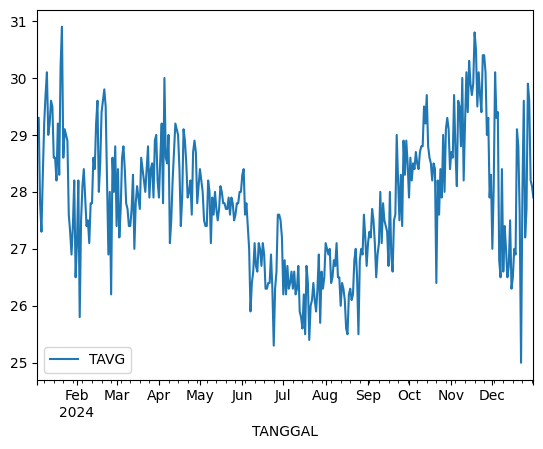

In [ ]:
#Trend suhu rata-rata di Banyuwangi
import pandas as pd

df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/BANYUWANGI_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw.plot(x="TANGGAL", y="TAVG")

<Axes: xlabel='TANGGAL'>

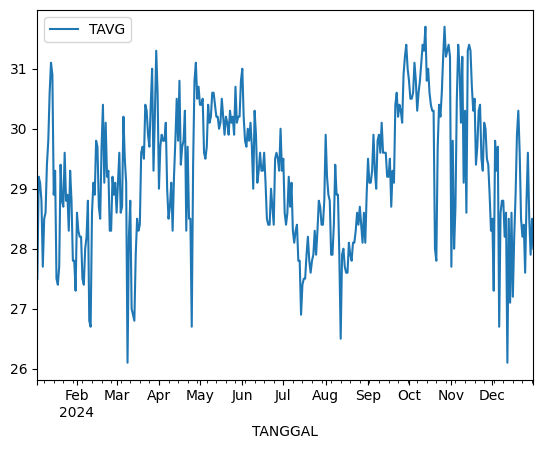

In [ ]:
#Trend suhu rata-rata di Surabaya
import pandas as pd

df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/SURABAYA_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw.plot(x="TANGGAL", y="TAVG")

/tmp/ipython-input-146552157.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_bw["TAVG"].resample('M').mean()


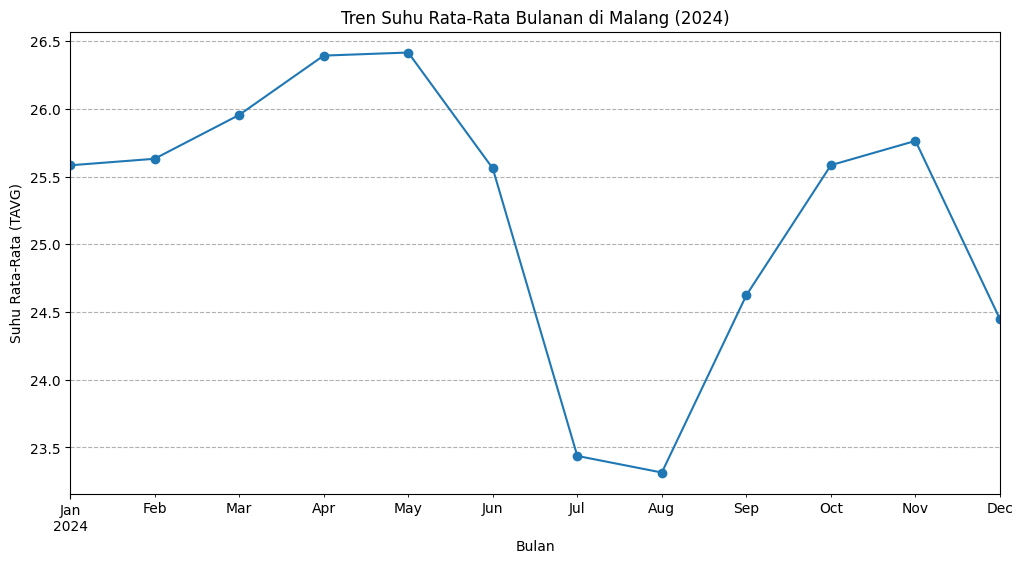

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/MALANG_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw = df_bw.set_index("TANGGAL")
df_monthly = df_bw["TAVG"].resample('M').mean()
plt.figure(figsize=(12, 6))
df_monthly.plot(kind='line', marker='o')

plt.title('Tren Suhu Rata-Rata Bulanan di Malang (2024)')
plt.xlabel('Bulan')
plt.ylabel('Suhu Rata-Rata (TAVG)')
plt.grid(axis='y', linestyle='--')
plt.show()
#

<Axes: xlabel='TANGGAL'>

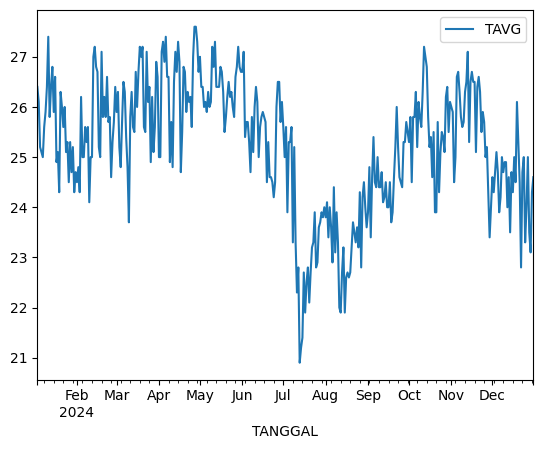

In [ ]:
#Trend suhu rata-rata di Malang
import pandas as pd

df_bw = pd.read_excel("/content/drive/MyDrive/Data_Iklim/Cleaned/MALANG_2024_cleaned.xlsx")
df_bw["TANGGAL"] = pd.to_datetime(df_bw["TANGGAL"])

df_bw.plot(x="TANGGAL", y="TAVG")

In [ ]:
import pandas as pd
import os

# Path folder berisi file cleaned per kota
folder_path = "/content/drive/MyDrive/Data_Iklim/Cleaned" # Corrected folder path

# Daftar file dan nama kotanya
files = {
    "BANYUWANGI": "BANYUWANGI_2024_cleaned.xlsx",
    "MALANG": "MALANG_2024_cleaned.xlsx",
    "SURABAYA": "SURABAYA_2024_cleaned.xlsx"
}

all_data = []

for city, filename in files.items():
    file_path = os.path.join(folder_path, filename)

    # baca file excel
    df = pd.read_excel(file_path)

    # pastikan kolom tanggal dalam format datetime
    df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")

    # tambah kolom kota
    df["kota"] = city

    all_data.append(df)

# gabungkan semua kota
df_all = pd.concat(all_data, ignore_index=True)

# urutkan berdasarkan tanggal + kota
df_all = df_all.sort_values(by=["TANGGAL", "kota"])

# reset index
df_all.reset_index(drop=True, inplace=True)

# simpan hasil final
save_path = "/content/drive/MyDrive/Data_Iklim/data_gabungan_standar.xlsx"
df_all.to_excel(save_path, index=False)

save_path

'/content/drive/MyDrive/Data_Iklim/data_gabungan_standar.xlsx'

In [ ]:
#rata-rata suhu tiap kota/kabuoaten
df_all.groupby("kota")["TAVG"].mean()


,TAVG
kota,
BANYUWANGI,27.837912
MALANG,25.217033
SURABAYA,29.259890


<Axes: xlabel='TANGGAL', ylabel='TAVG'>

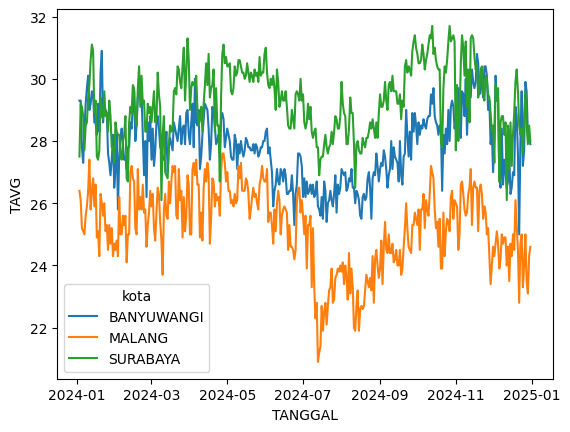

In [ ]:
import seaborn as sns
sns.lineplot(data=df_all, x="TANGGAL", y="TAVG", hue="kota")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset gabungan
file_path = "/content/drive/MyDrive/Data_Iklim/data_gabungan_standar.xlsx"
df = pd.read_excel(file_path)

# Pastikan format tanggal benar
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])

# Tambahkan kolom bulan (format: 2024-01, 2024-02, dst)
df['bulan'] = df['TANGGAL'].dt.to_period('M')


=== SUHU RATA-RATA PER KOTA (Derajat Celcius) ===
kota
SURABAYA      29.259890
BANYUWANGI    27.837912
MALANG        25.217033
Name: TAVG, dtype: float64


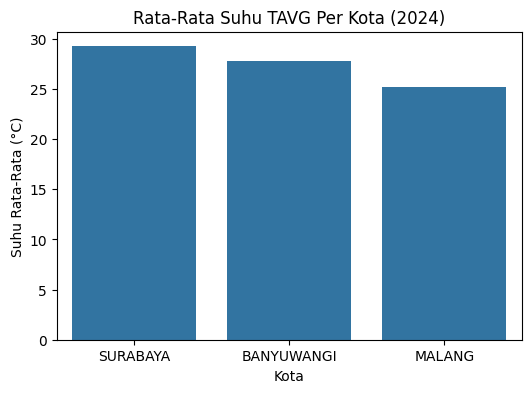

In [ ]:
# Rata-rata suhu per kota
suhu_per_kota = df.groupby("kota")["TAVG"].mean().sort_values(ascending=False)

print("=== SUHU RATA-RATA PER KOTA (Derajat Celcius) ===")
print(suhu_per_kota)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=suhu_per_kota.index, y=suhu_per_kota.values)
plt.title("Rata-Rata Suhu TAVG Per Kota (2024)")
plt.xlabel("Kota")
plt.ylabel("Suhu Rata-Rata (°C)")
plt.show()


=== TOTAL CURAH HUJAN PER KOTA (RR) ===
kota
MALANG        2025.5
BANYUWANGI    1577.8
SURABAYA      1491.2
Name: RR, dtype: float64


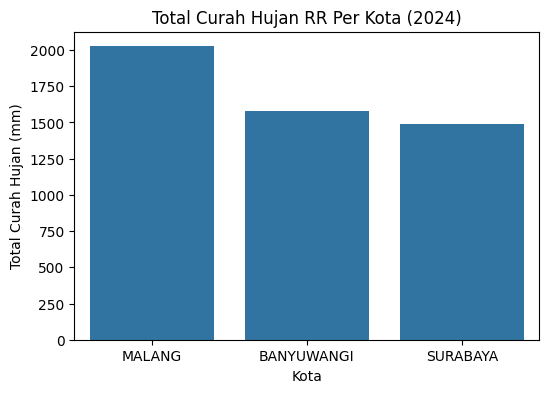

In [ ]:
# Total curah hujan per kota
hujan_per_kota = df.groupby("kota")["RR"].sum().sort_values(ascending=False)

print("=== TOTAL CURAH HUJAN PER KOTA (RR) ===")
print(hujan_per_kota)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x=hujan_per_kota.index, y=hujan_per_kota.values)
plt.title("Total Curah Hujan RR Per Kota (2024)")
plt.xlabel("Kota")
plt.ylabel("Total Curah Hujan (mm)")
plt.show()


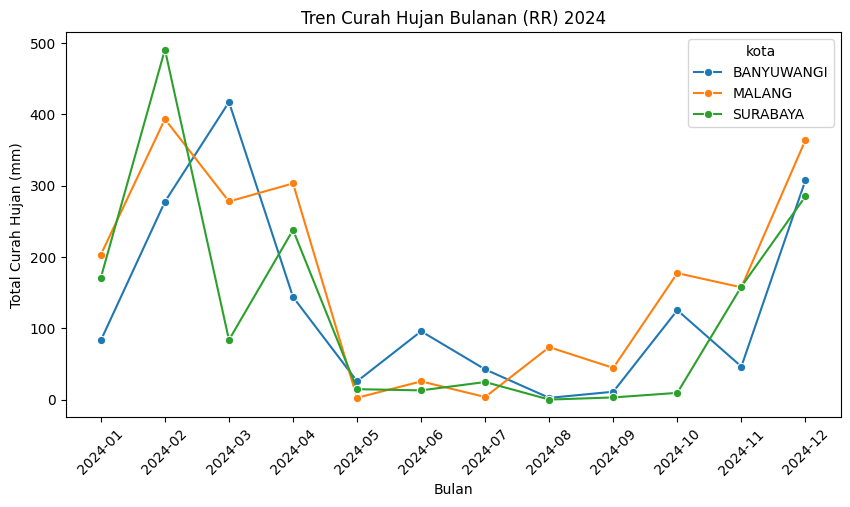

In [ ]:
# Total hujan per bulan tiap kota
hujan_bulanan = df.groupby(["kota", "bulan"])["RR"].sum().reset_index()

# Convert 'bulan' to string for plotting compatibility
hujan_bulanan["bulan"] = hujan_bulanan["bulan"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=hujan_bulanan, x="bulan", y="RR", hue="kota", marker="o")
plt.title("Tren Curah Hujan Bulanan (RR) 2024")
plt.xlabel("Bulan")
plt.ylabel("Total Curah Hujan (mm)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

df_iklim = pd.read_excel("/content/data_gabungan_standar.xlsx")
df_pengeluaran = pd.read_excel("/content/rekap_agregasi_per_kota.xlsx")
df_iklim.head(), df_pengeluaran.head()

(     tanggal  t_min  t_max  t_avg  rh_avg  curah_hujan  lama_penyinaran  \
 0 2024-01-03   26.5   33.4   29.3      74          0.1             10.3   
 1 2024-01-04   26.0   33.0   29.3      74          0.0              3.4   
 2 2024-01-05   25.6   31.6   27.8      81          0.1              6.8   
 3 2024-01-06   24.8   30.2   27.3      82          3.2              2.9   
 4 2024-01-07   25.8   32.3   28.3      75          0.6              0.0   
 
    angin_max  arah_angin_max  angin_avg DDD_CAR        kota  
 0          8              40          2      W   BANYUWANGI  
 1          5             100          1      C   BANYUWANGI  
 2          5             180          1      C   BANYUWANGI  
 3          3             170          1      C   BANYUWANGI  
 4          5             180          1      C   BANYUWANGI  ,
          kota      t_min      t_max      t_avg     rh_avg  curah_hujan  \
 0  BANYUWANGI  25.030632  31.252747  27.837912  77.942308       1577.8   
 1      MALAN

In [ ]:
df_iklim['kota'] = df_iklim['kota'].str.upper().str.strip()


In [ ]:
df_iklim['tanggal'] = pd.to_datetime(df_iklim['tanggal'])
df_iklim['bulan'] = df_iklim['tanggal'].dt.month
#Tmabahkan kolom bulan

In [ ]:
import pandas as pd # Ensure pandas is imported if not already, though it is.

# Create a DataFrame with months 1 to 12
months_df = pd.DataFrame({'bulan': range(1, 13)})

# Cross-join df_pengeluaran with months_df to replicate each city's data for all 12 months
df_pengeluaran_expanded = df_pengeluaran.merge(months_df, how='cross')

df_join = pd.merge(
    df_iklim,
    df_pengeluaran_expanded, # Use the expanded DataFrame
    left_on=['kota', 'bulan'],
    right_on=['kota', 'bulan'], # Changed 'Kabupaten/Kota' to 'kota'
    how='left'
)

In [ ]:
import pandas as pd

pengeluaran_path_string = "/content/drive/MyDrive/Data_Iklim/pengeluaran_jatim_2024/rata-rata pengeluaran.csv"
df_pengeluaran = pd.read_csv(pengeluaran_path_string)

In [ ]:
df_pengeluaran.shape

(39, 5)

In [ ]:
df_pengeluaran.columns


Index(['No.', 'Kabupaten/Kota', 'Makanan', 'Bukan Makanan',
       'Rata-rata Pengeluaran'],
      dtype='object')

In [ ]:
df_pengeluaran.head()

,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran
0,1.,Kab. Pacitan,520.500,401.499,921.999
1,2.,Kab. Ponorogo,543.502,545.871,1.089.373
2,3.,Kab. Trenggalek,500.993,468.004,968.997
3,4.,Kab. Tulungagung,561.154,516.744,1.077.898
4,5.,Kab. Blitar,543.633,543.669,1.087.302


In [ ]:
df_pengeluaran.isna().sum()


,0
No.,0
Kabupaten/Kota,0
Makanan,0
Bukan Makanan,0
Rata-rata Pengeluaran,0


In [ ]:
df_pengeluaran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   No.                    39 non-null     object
 1   Kabupaten/Kota         39 non-null     object
 2   Makanan                39 non-null     object
 3   Bukan Makanan          39 non-null     object
 4   Rata-rata Pengeluaran  39 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [ ]:
print("Jumlah kolom:", len(df.columns))
print("\nDaftar kolom:")
for col in df.columns:
    print(col)


Jumlah kolom: 13

Daftar kolom:
TANGGAL
TN
TX
TAVG
RH_AVG
RR
SS
FF_X
DDD_X
FF_AVG
DDD_CAR
kota
bulan


In [ ]:
import pandas as pd

# Reuse the df_pengeluaran DataFrame already loaded and partially cleaned
# (The 'Kabupaten/Kota' column was already cleaned in cell 3bxGJGLxD6bC)

# Identify columns that need numeric conversion
numeric_cols_to_clean = ["Makanan", "Bukan Makanan", "Rata-rata Pengeluaran"]

# Convert these columns to numeric by removing thousands separators and casting to float
for col in numeric_cols_to_clean:
    # Ensure the column is string type before applying .str accessor
    df_pengeluaran[col] = df_pengeluaran[col].astype(str).str.replace(".", "", regex=False).astype(float)

df_pengeluaran.head()

,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran
0,1.,Kab. Pacitan,520500.0,401499.0,921999.0
1,2.,Kab. Ponorogo,543502.0,545871.0,1089373.0
2,3.,Kab. Trenggalek,500993.0,468004.0,968997.0
3,4.,Kab. Tulungagung,561154.0,516744.0,1077898.0
4,5.,Kab. Blitar,543633.0,543669.0,1087302.0


Agregasi Data Iklim dan Pengeluaran

In [ ]:
import pandas as pd

# Pastikan tanggal sudah datetime
df_iklim['tanggal'] = pd.to_datetime(df_iklim['tanggal'], errors='coerce')

# Tambah kolom tahun
df_iklim['tahun'] = df_iklim['tanggal'].dt.year

# Agregasi tahunan per kota
df_iklim_tahunan = df_iklim.groupby(['kota', 'tahun']).agg({
    't_avg': 'mean',
    't_min': 'mean',
    't_max': 'mean',
    'rh_avg': 'mean',
    'curah_hujan': 'sum',
    'angin_avg': 'mean'
}).reset_index()

df_iklim_tahunan.head()


,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg
0,BANYUWANGI,2024,27.837912,25.030632,31.252747,77.942308,1577.8,1.920330
1,MALANG,2024,25.217033,20.408929,29.882143,76.755495,2025.5,1.807692
2,SURABAYA,2024,29.259890,25.714286,34.007143,74.052198,1491.2,2.000000


In [ ]:
df_pengeluaran['kota_fix'] = (
    df_pengeluaran['Kabupaten/Kota']
    .str.replace('Kab. ', 'KAB. ', regex=False)
    .str.upper()
)

In [ ]:
df_merge = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='kota_fix',
    how='right'
)


In [ ]:
# 1. Standardisasi kota
df_pengeluaran['kota_fix'] = df_pengeluaran['Kabupaten/Kota'].str.upper()

# 2. Pisahkan kabupaten malang dan kota malang
df_pengeluaran.loc[df_pengeluaran['kota_fix'].str.contains('KAB. MALANG'), 'kota_fix'] = 'KAB. MALANG'
df_pengeluaran.loc[df_pengeluaran['kota_fix'] == 'MALANG', 'kota_fix'] = 'KOTA MALANG'

# 3. Merge
df_merge = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='kota_fix',
    how='right'
)

# 4. Filter hanya 4 daerah
daerah_target = ['BANYUWANGI', 'SURABAYA', 'KOTA MALANG', 'KAB. MALANG']
df_final = df_merge[df_merge['kota_fix'].isin(daerah_target)]

df_final


,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,kota_fix
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.,Kab. Malang,631096.0,529858.0,1160954.0,KAB. MALANG
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.,Kota Malang,738702.0,1216256.0,1954957.0,KOTA MALANG


In [ ]:
#Beneran Jdi plis
# Buat kolom kota_fix (nama bersih)
df_pengeluaran['kota_fix'] = df_pengeluaran['Kabupaten/Kota'].str.upper()

# Bedakan Kab. Malang dan Kota Malang
df_pengeluaran.loc[df_pengeluaran['kota_fix'] == 'KAB. MALANG', 'kota_fix'] = 'KAB. MALANG'
df_pengeluaran.loc[df_pengeluaran['kota_fix'] == 'MALANG', 'kota_fix'] = 'MALANG (KOTA)'

df_iklim_tahunan.loc[df_iklim_tahunan['kota'] == 'MALANG', 'kota'] = 'MALANG (KOTA)'

df_merge = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='kota_fix',
    how='right'     # supaya kabupaten malang tetap muncul walaupun tidak punya iklim
)

daerah_target = ['BANYUWANGI', 'SURABAYA', 'MALANG (KOTA)', 'KAB. MALANG']
df_final = df_merge[df_merge['kota_fix'].isin(daerah_target)]
df_final

,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,kota_fix
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.,Kab. Malang,631096.0,529858.0,1160954.0,KAB. MALANG


In [ ]:
df_final = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='Kabupaten/Kota',
    how='left'
)

df_final.head()


,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,kota_fix
0,BANYUWANGI,2024,27.837912,25.030632,31.252747,77.942308,1577.8,1.920330,NaN,NaN,NaN,NaN,NaN,NaN
1,MALANG (KOTA),2024,25.217033,20.408929,29.882143,76.755495,2025.5,1.807692,NaN,NaN,NaN,NaN,NaN,NaN
2,SURABAYA,2024,29.259890,25.714286,34.007143,74.052198,1491.2,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Buat kolom kota_fix (nama bersih)
df_pengeluaran['kota_fix'] = df_pengeluaran['Kabupaten/Kota'].str.upper()

# Bedakan Kab. Malang dan Kota Malang
df_pengeluaran.loc[df_pengeluaran['kota_fix'] == 'KAB. MALANG', 'kota_fix'] = 'KAB. MALANG'
df_pengeluaran.loc[df_pengeluaran['kota_fix'] == 'MALANG', 'kota_fix'] = 'MALANG (KOTA)'

df_iklim_tahunan.loc[df_iklim_tahunan['kota'] == 'MALANG', 'kota'] = 'MALANG (KOTA)'


In [ ]:
df_merge = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='kota_fix',
    how='right'     # supaya kabupaten malang tetap muncul walaupun tidak punya iklim
)


In [ ]:
df_iklim_pengeluaran = df_iklim_tahunan.merge(
    df_pengeluaran,
    left_on='kota',
    right_on='Kabupaten/Kota',
    how='left'
)

In [ ]:
daerah_target = ['KAB. BANYUWANGI', 'KOTA SURABAYA', 'KOTA MALANG', 'KAB. MALANG']
df_final = df_merge[df_merge['kota_fix'].isin(daerah_target)]
df_final


,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,kota_fix
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.,Kab. Malang,631096.0,529858.0,1160954.0,KAB. MALANG
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.,Kab. Banyuwangi,794027.0,722269.0,1516296.0,KAB. BANYUWANGI
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.,Kota Malang,738702.0,1216256.0,1954957.0,KOTA MALANG
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.,Kota Surabaya,1061449.0,1541008.0,2602456.0,KOTA SURABAYA


In [ ]:
df_iklim_tahunan['kota_norm'] = df_iklim_tahunan['kota'].str.upper()

df_iklim_tahunan['kota_norm'] = df_iklim_tahunan['kota_norm'].replace({
    'MALANG (KOTA)': 'KOTA MALANG',
    'SURABAYA': 'KOTA SURABAYA',
    'BANYUWANGI': 'KAB. BANYUWANGI'   # karena di pengeluaran namanya KAB. BANYUWANGI
})


In [ ]:
df_pengeluaran['kota_fix'].unique()

array(['KAB. PACITAN', 'KAB. PONOROGO', 'KAB. TRENGGALEK',
       'KAB. TULUNGAGUNG', 'KAB. BLITAR', 'KAB. KEDIRI', 'KAB. MALANG',
       'KAB. LUMAJANG', 'KAB. JEMBER', 'KAB. BANYUWANGI',
       'KAB. BONDOWOSO', 'KAB. SITUBONDO', 'KAB. PROBOLINGGO',
       'KAB. PASURUAN', 'KAB. SIDOARJO', 'KAB. MOJOKERTO', 'KAB. JOMBANG',
       'KAB. NGANJUK', 'KAB. MADIUN', 'KAB. MAGETAN', 'KAB. NGAWI',
       'KAB. BOJONEGORO', 'KAB. TUBAN', 'KAB. LAMONGAN', 'KAB. GRESIK',
       'KAB. BANGKALAN', 'KAB. SAMPANG', 'KAB. PAMEKASAN', 'KAB. SUMENEP',
       'KOTA KEDIRI', 'KOTA BLITAR', 'KOTA MALANG', 'KOTA PROBOLINGGO',
       'KOTA PASURUAN', 'KOTA MOJOKERTO', 'KOTA MADIUN', 'KOTA SURABAYA',
       'KOTA BATU', 'JAWA TIMUR'], dtype=object)

In [ ]:
df_pengeluaran['Kabupaten/Kota'].unique()

array(['Kab. Pacitan', 'Kab. Ponorogo', 'Kab. Trenggalek',
       'Kab. Tulungagung', 'Kab. Blitar', 'Kab. Kediri', 'Kab. Malang',
       'Kab. Lumajang', 'Kab. Jember', 'Kab. Banyuwangi',
       'Kab. Bondowoso', 'Kab. Situbondo', 'Kab. Probolinggo',
       'Kab. Pasuruan', 'Kab. Sidoarjo', 'Kab. Mojokerto', 'Kab. Jombang',
       'Kab. Nganjuk', 'Kab. Madiun', 'Kab. Magetan', 'Kab. Ngawi',
       'Kab. Bojonegoro', 'Kab. Tuban', 'Kab. Lamongan', 'Kab. Gresik',
       'Kab. Bangkalan', 'Kab. Sampang', 'Kab. Pamekasan', 'Kab. Sumenep',
       'Kota Kediri', 'Kota Blitar', 'Kota Malang', 'Kota Probolinggo',
       'Kota Pasuruan', 'Kota Mojokerto', 'Kota Madiun', 'Kota Surabaya',
       'Kota Batu', 'Jawa Timur'], dtype=object)

In [ ]:
df_iklim_tahunan['kota'].unique()

array(['BANYUWANGI', 'MALANG (KOTA)', 'SURABAYA'], dtype=object)

In [ ]:
df_iklim_tahunan['kota'].unique()

array(['BANYUWANGI', 'MALANG (KOTA)', 'SURABAYA'], dtype=object)

In [ ]:
#BISMILLAH JADI
df_pengeluaran['kota_fix'] = (
    df_pengeluaran['Kabupaten/Kota']
    .str.replace('Kab. ', '', regex=False)
    .str.replace('Kota ', '', regex=False)
    .str.upper()
    .str.strip()
)


In [ ]:
#buat kolom kota fix pada data iklim
df_iklim_tahunan['kota_fix'] = (
    df_iklim_tahunan['kota']
    .str.replace(' (KOTA)', '', regex=False)
    .str.upper()
)


In [ ]:
df_final = df_pengeluaran.merge(
    df_iklim_tahunan,
    on='kota_fix',
    how='left'
)


In [ ]:
daerah_target = ['BANYUWANGI', 'SURABAYA', 'MALANG', 'MALANG']
# catatan: kabupaten dan kota malang sama2 'MALANG' pada kota_fix

df_final = df_final[df_final['kota_fix'].isin(['BANYUWANGI','SURABAYA','MALANG'])]
df_final

,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,kota_fix,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,kota_norm
6,7.,Kab. Malang,631096.0,529858.0,1160954.0,MALANG,MALANG (KOTA),2024.0,25.217033,20.408929,29.882143,76.755495,2025.5,1.807692,KOTA MALANG
9,10.,Kab. Banyuwangi,794027.0,722269.0,1516296.0,BANYUWANGI,BANYUWANGI,2024.0,27.837912,25.030632,31.252747,77.942308,1577.8,1.920330,KAB. BANYUWANGI
31,73.,Kota Malang,738702.0,1216256.0,1954957.0,MALANG,MALANG (KOTA),2024.0,25.217033,20.408929,29.882143,76.755495,2025.5,1.807692,KOTA MALANG
36,78.,Kota Surabaya,1061449.0,1541008.0,2602456.0,SURABAYA,SURABAYA,2024.0,29.259890,25.714286,34.007143,74.052198,1491.2,2.000000,KOTA SURABAYA


In [ ]:
df_iklim_pengeluaran = df_final.drop(index=6) #menghapus kab malang
df_iklim_pengeluaran

,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,kota_fix,kota,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg,kota_norm
9,10.,Kab. Banyuwangi,794027.0,722269.0,1516296.0,BANYUWANGI,BANYUWANGI,2024.0,27.837912,25.030632,31.252747,77.942308,1577.8,1.920330,KAB. BANYUWANGI
31,73.,Kota Malang,738702.0,1216256.0,1954957.0,MALANG,MALANG (KOTA),2024.0,25.217033,20.408929,29.882143,76.755495,2025.5,1.807692,KOTA MALANG
36,78.,Kota Surabaya,1061449.0,1541008.0,2602456.0,SURABAYA,SURABAYA,2024.0,29.259890,25.714286,34.007143,74.052198,1491.2,2.000000,KOTA SURABAYA


In [ ]:
df_final = df_iklim_pengeluaran.drop(columns=['kota_fix', 'kota', 'kota_norm']) #menghapus kolom kota yang sama aja
df_final

,No.,Kabupaten/Kota,Makanan,Bukan Makanan,Rata-rata Pengeluaran,tahun,t_avg,t_min,t_max,rh_avg,curah_hujan,angin_avg
9,10.,Kab. Banyuwangi,794027.0,722269.0,1516296.0,2024.0,27.837912,25.030632,31.252747,77.942308,1577.8,1.920330
31,73.,Kota Malang,738702.0,1216256.0,1954957.0,2024.0,25.217033,20.408929,29.882143,76.755495,2025.5,1.807692
36,78.,Kota Surabaya,1061449.0,1541008.0,2602456.0,2024.0,29.259890,25.714286,34.007143,74.052198,1491.2,2.000000


Data Publishing

Visualisasi

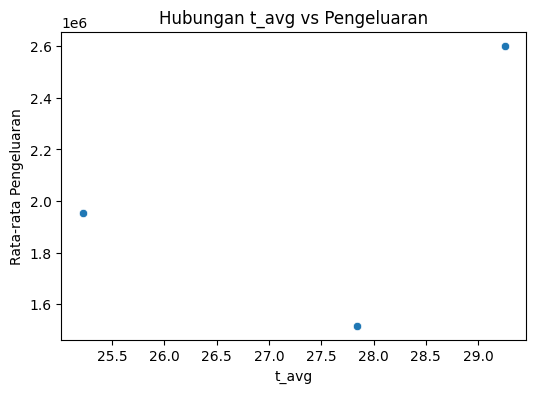

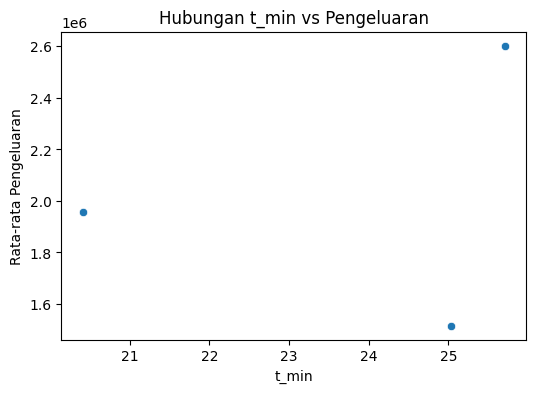

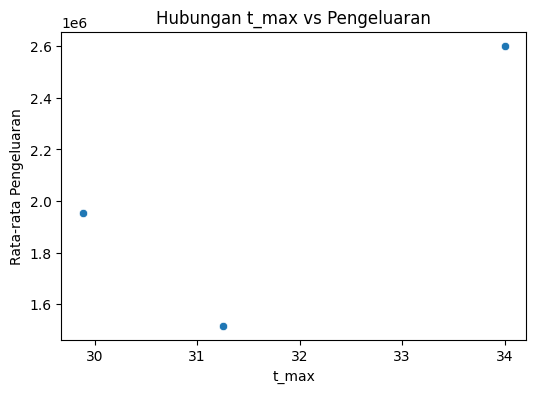

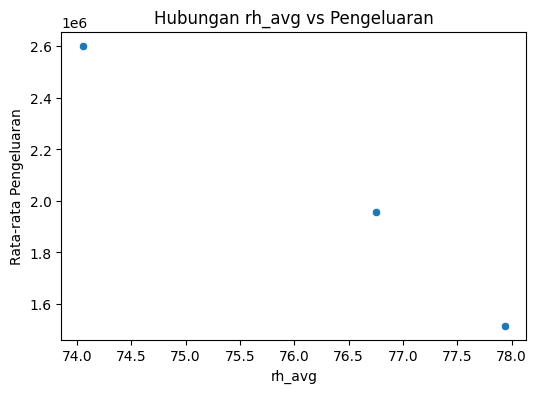

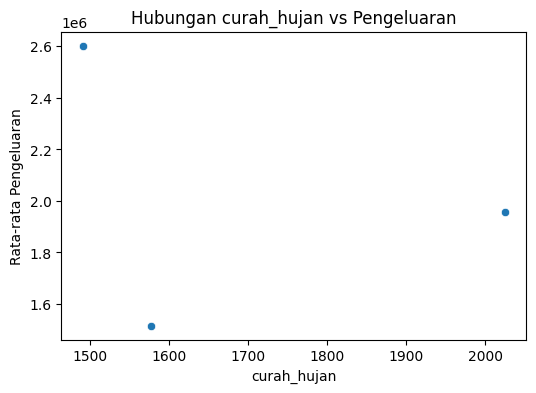

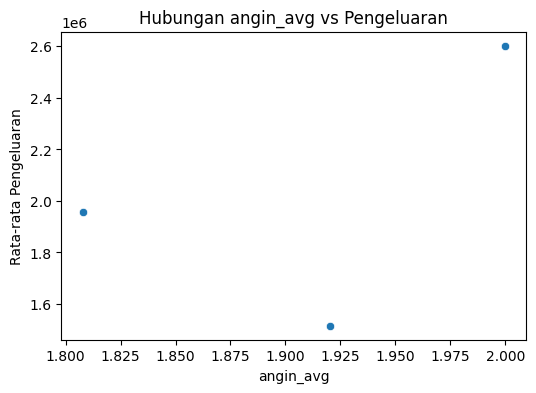

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numeric_cols = ["t_avg", "t_min", "t_max", "rh_avg", "curah_hujan", "angin_avg", "Rata-rata Pengeluaran"]

# Scatter plot setiap variabel terhadap pengeluaran
for col in numeric_cols[:-1]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_iklim_pengeluaran, x=col, y="Rata-rata Pengeluaran")
    plt.title(f"Hubungan {col} vs Pengeluaran")
    plt.show()


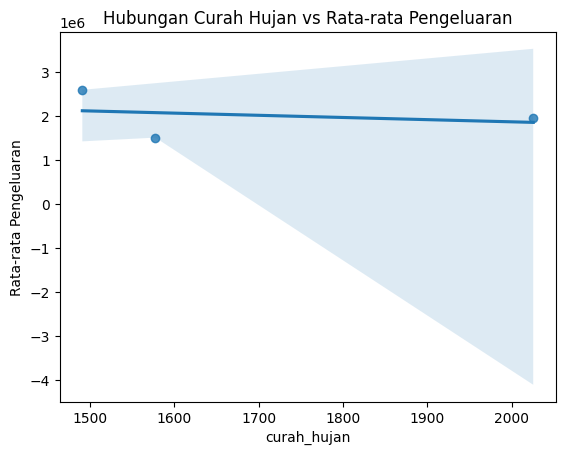

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="curah_hujan", y="Rata-rata Pengeluaran", data=df_iklim_pengeluaran)
plt.title("Hubungan Curah Hujan vs Rata-rata Pengeluaran")
plt.show()

In [ ]:
hasil = (
    df_iklim_pengeluaran.groupby("kota")
    .apply(lambda x: x["t_avg"].corr(x["Rata-rata Pengeluaran"])) # Changed 'Pengeluaran' to 'Rata-rata Pengeluaran'
    .reset_index(name="korelasi_suhu_pengeluaran")
)

hasil

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/tmp/ipython-input-2846761666.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["t_avg"].corr(x["Rata-rata Pengeluaran"])) # Changed 'Pengeluaran' to 'Rata-rata Pengeluaran'


,kota,korelasi_suhu_pengeluaran
0,BANYUWANGI,NaN
1,MALANG (KOTA),NaN
2,SURABAYA,NaN


In [ ]:
for i, row in hasil.iterrows():
    kota = row["kota"]
    corr = row["korelasi_suhu_pengeluaran"]

    if corr > 0.3:
        print(f"{kota}: pengeluaran NAIK saat suhu tinggi (korelasi {corr:.2f})")
    elif corr < -0.3:
        print(f"{kota}: pengeluaran TURUN saat suhu tinggi (korelasi {corr:.2f})")
    else:
        print(f"{kota}: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi {corr:.2f})")


BANYUWANGI: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi nan)
MALANG (KOTA): tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi nan)
SURABAYA: tidak ada pengaruh signifikan suhu terhadap pengeluaran (korelasi nan)


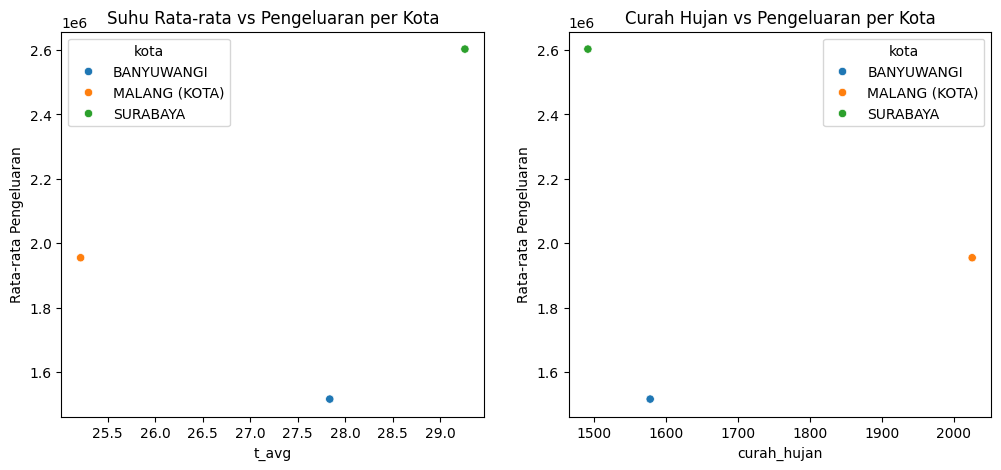

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(data=df_iklim_pengeluaran, x="t_avg", y="Rata-rata Pengeluaran", hue="kota", ax=ax[0])
ax[0].set_title("Suhu Rata-rata vs Pengeluaran per Kota")

sns.scatterplot(data=df_iklim_pengeluaran, x="curah_hujan", y="Rata-rata Pengeluaran", hue="kota", ax=ax[1])
ax[1].set_title("Curah Hujan vs Pengeluaran per Kota")

plt.show()